In [2]:
pip install torch torchvision


  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.6 MB 2.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.6 MB 3.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 3.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 3.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.6 MB 3.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.2/1.6 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.4/1.6 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.4 MB/s eta 0:00:00
   ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.


In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import os
from torchvision.utils import save_image

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

In [3]:
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:42<00:00, 627kB/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 149kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:11<00:00, 393kB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.16MB/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [4]:
gallery_size = int(len(dataset) * 0.8)
query_size = len(dataset) - gallery_size
gallery_set, query_set = random_split(dataset, [gallery_size, query_size])


In [5]:
gallery_loader = DataLoader(gallery_set, batch_size=64, shuffle=True)
query_loader = DataLoader(query_set, batch_size=64, shuffle=False)

In [6]:
def show_images(data_loader, title):
    batch = next(iter(data_loader))
    images, labels = batch
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(images[i][0], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()


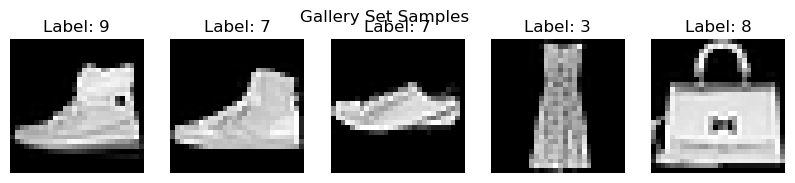

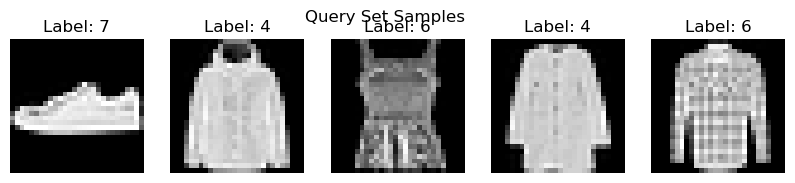

In [7]:
show_images(gallery_loader, "Gallery Set Samples")
show_images(query_loader, "Query Set Samples")

In [8]:
def save_dataset(data_loader, folder):
    os.makedirs(folder, exist_ok=True)
    for idx, (images, labels) in enumerate(data_loader):
        for i, image in enumerate(images):
            save_image(image, f"{folder}/img_{idx * len(images) + i}.png")

save_dataset(gallery_loader, './gallery_set')
save_dataset(query_loader, './query_set')

In [9]:
import torch
import torch.nn as nn
from torchvision import models
from tqdm import tqdm

In [10]:
resnet_model = models.resnet50(pretrained=True)  # Load ResNet-50
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])  # Remove the final classification layer
resnet_model.eval()

c:\Users\Anirudh Gupta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Anirudh Gupta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Anirudh Gupta/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:20<00:00, 4.98MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [12]:
def extract_features(data_loader, model):
    features = []
    labels = []
    with torch.no_grad():
        for images, lbls in tqdm(data_loader, desc="Extracting Features"):
            images = images.to(device)
            output = model(images)  # Extract features
            output = output.view(output.size(0), -1)  # Flatten the features
            features.append(output.cpu())
            labels.append(lbls)
    return torch.cat(features), torch.cat(labels)

In [14]:
# Updated transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.Resize((224, 224)),                # Resize images to 224x224 for ResNet
    transforms.ToTensor(),                        # Convert image to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize as per ResNet
])

# Reload the dataset with updated transform
fashion_mnist_dataset = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=transform,
    download=True
)

# Re-split the dataset and DataLoader creation
gallery_size = int(len(fashion_mnist_dataset) * 0.8)
query_size = len(fashion_mnist_dataset) - gallery_size
gallery_dataset, query_dataset = random_split(fashion_mnist_dataset, [gallery_size, query_size])

gallery_loader = DataLoader(gallery_dataset, batch_size=64, shuffle=False)
query_loader = DataLoader(query_dataset, batch_size=64, shuffle=False)


In [15]:
print("Extracting features for the gallery set...")
gallery_features, gallery_labels = extract_features(gallery_loader, resnet_model)
print("Extracting features for the query set...")
query_features, query_labels = extract_features(query_loader, resnet_model)

Extracting features for the gallery set...


Extracting Features: 100%|██████████| 750/750 [7:12:46<00:00, 34.62s/it]      


Extracting features for the query set...


Extracting Features: 100%|██████████| 188/188 [54:13<00:00, 17.31s/it]


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [23]:
# Check if gallery_features is a tensor or a list
if isinstance(gallery_features, list):
    # Concatenate if it's a list of tensors
    gallery_features_np = torch.cat(gallery_features).numpy()
elif isinstance(gallery_features, torch.Tensor):
    # Directly convert if it's a tensor
    gallery_features_np = gallery_features.numpy()
else:
    raise TypeError("gallery_features must be a list of tensors or a tensor.")

# Similarly for query_features
if isinstance(query_features, list):
    query_features_np = torch.cat(query_features).numpy()
elif isinstance(query_features, torch.Tensor):
    query_features_np = query_features.numpy()
else:
    raise TypeError("query_features must be a list of tensors or a tensor.")


In [24]:
print(f"Type of gallery_features: {type(gallery_features)}")
if isinstance(gallery_features, list):
    print(f"Number of tensors in gallery_features: {len(gallery_features)}")
    print(f"Shape of first tensor: {gallery_features[0].shape}")
elif isinstance(gallery_features, torch.Tensor):
    print(f"Shape of gallery_features: {gallery_features.shape}")

print(f"Type of query_features: {type(query_features)}")
if isinstance(query_features, list):
    print(f"Number of tensors in query_features: {len(query_features)}")
    print(f"Shape of first tensor: {query_features[0].shape}")
elif isinstance(query_features, torch.Tensor):
    print(f"Shape of query_features: {query_features.shape}")


Type of gallery_features: <class 'torch.Tensor'>
Shape of gallery_features: torch.Size([48000, 2048])
Type of query_features: <class 'torch.Tensor'>
Shape of query_features: torch.Size([12000, 2048])


In [3]:
import torch


In [7]:
import torch
from tqdm import tqdm

def extract_features(data_loader, model):
    model.eval()  # Set the model to evaluation mode
    features = []
    labels = []
    with torch.no_grad():  # Disable gradient computation for inference
        for images, lbls in tqdm(data_loader, desc="Extracting Features"):
            images = images.to(device)  # Move images to the same device as the model
            lbls = lbls.to(device)  # Move labels to the same device as the model
            output = model(images)  # Extract features
            output = output.view(output.size(0), -1)  # Flatten the features
            features.append(output.cpu())  # Append to the list
            labels.append(lbls.cpu())  # Append labels
    # Concatenate features and labels into tensors
    return torch.cat(features), torch.cat(labels)


In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to match pre-trained models
])

# Load Fashion MNIST dataset
dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Split the dataset into gallery and query sets
gallery_size = int(len(dataset) * 0.8)  # 80% for gallery
query_size = len(dataset) - gallery_size  # 20% for query
gallery_dataset, query_dataset = random_split(dataset, [gallery_size, query_size])

# Create DataLoaders
gallery_loader = DataLoader(gallery_dataset, batch_size=64, shuffle=True)
query_loader = DataLoader(query_dataset, batch_size=64, shuffle=True)


In [11]:
import torch
import torchvision.models as models

# Load pre-trained ResNet model
resnet_model = models.resnet18(pretrained=True)
resnet_model.fc = torch.nn.Identity()  # Replace the classification head with an identity layer

# Send the model to the appropriate device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet_model = resnet_model.to(device)


c:\Users\Anirudh Gupta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Anirudh Gupta\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Anirudh Gupta/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:09<00:00, 5.12MB/s]


In [12]:
print(type(gallery_loader))  # Should be <class 'torch.utils.data.dataloader.DataLoader'>
print(type(resnet_model))  # Should be <class 'torch.nn.modules.module.Module'>


<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torchvision.models.resnet.ResNet'>


In [19]:
# Assuming the extract_features function is defined and the DataLoader is properly set up

# Extract features for the gallery and query sets
print("Extracting features for the gallery set...")
gallery_features, gallery_labels = extract_features(gallery_loader, resnet_model)

print("Extracting features for the query set...")
query_features, query_labels = extract_features(query_loader, resnet_model)

# After extraction, you should now have the gallery_features and query_features defined


Extracting features for the gallery set...


Extracting Features: 100%|██████████| 750/750 [02:34<00:00,  4.87it/s]


Extracting features for the query set...


Extracting Features: 100%|██████████| 188/188 [00:32<00:00,  5.72it/s]


In [26]:
# Ensure that gallery_features and query_features are lists
if isinstance(gallery_features, list):
    gallery_features_np = torch.cat(gallery_features, dim=0).numpy()
else:
    gallery_features_np = gallery_features.numpy()

if isinstance(query_features, list):
    query_features_np = torch.cat(query_features, dim=0).numpy()
else:
    query_features_np = query_features.numpy()



In [29]:
import numpy as np


In [30]:
# Normalize features for cosine similarity
gallery_features_np = gallery_features_np / np.linalg.norm(gallery_features_np, axis=1, keepdims=True)
query_features_np = query_features_np / np.linalg.norm(query_features_np, axis=1, keepdims=True)


In [31]:
def nearest_neighbor_search(query_features, gallery_features, gallery_labels, k=5):
    # Using NearestNeighbors with cosine similarity metric
    neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
    neigh.fit(gallery_features)
    distances, indices = neigh.kneighbors(query_features)
    
    return indices, distances

In [34]:
gallery_labels_np = np.array(gallery_labels)

In [37]:
from sklearn.neighbors import NearestNeighbors


In [38]:
# Perform the search (replace query_features_np with the actual query features you want to search)
indices, distances = nearest_neighbor_search(query_features_np, gallery_features_np, gallery_labels_np)

In [39]:
# Display the results for the first query
print("Indices of nearest neighbors:", indices[0])
print("Distances of nearest neighbors:", distances[0])

Indices of nearest neighbors: [23919 29436 45417  5117 12243]
Distances of nearest neighbors: [0.03413773 0.04083437 0.04408276 0.04551113 0.04784906]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


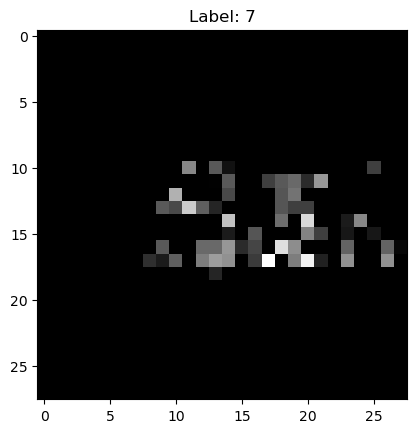

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


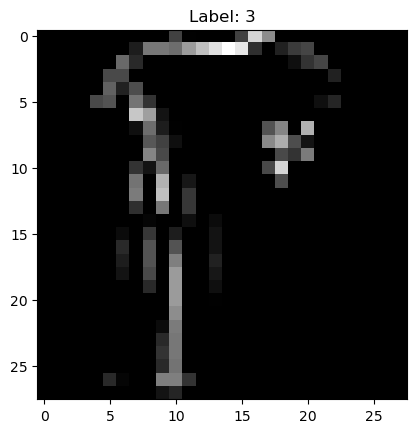

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


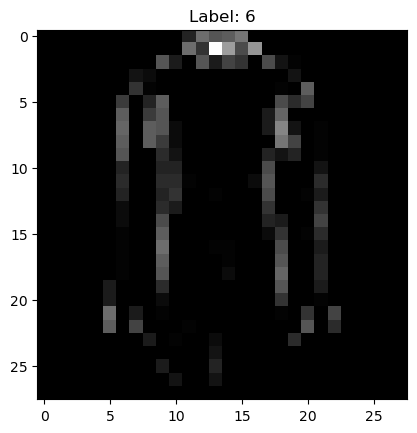

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


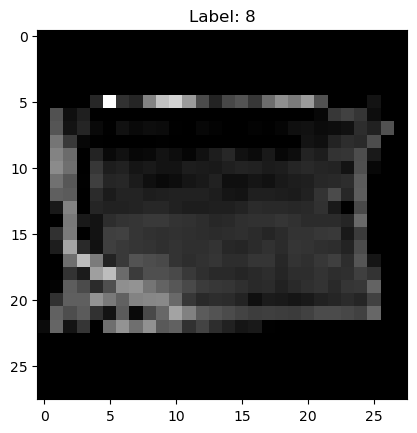

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


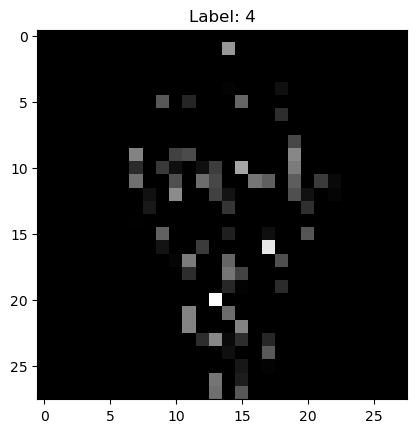

In [45]:
import matplotlib.pyplot as plt  # Ensure this is imported

def display_images(indices, loader, dataset, n=5):
    """Function to display images based on the indices from the nearest neighbor search."""
    for i in range(min(n, len(indices))):
        image, label = dataset[indices[i]]
        plt.imshow(image.permute(1, 2, 0))  # Change to correct format for display
        plt.title(f"Label: {label}")
        plt.show()

# Assuming `gallery_loader` is defined as your DataLoader
display_images(indices[0], gallery_loader, dataset)  # Adjust as needed


In [46]:
# Evaluate the accuracy of the nearest neighbor search
def evaluate_neighbors(indices, query_labels, gallery_labels, top_k=5):
    correct_count = 0
    for i in range(len(indices)):
        # Get the labels of the top-k nearest neighbors
        predicted_labels = gallery_labels[indices[i]]
        # Check if the query label matches any of the predicted labels
        if query_labels[i] in predicted_labels:
            correct_count += 1
    accuracy = correct_count / len(indices)
    print(f"Accuracy of nearest neighbor search: {accuracy * 100:.2f}%")

# Assuming you have query_labels and gallery_labels
evaluate_neighbors(indices, query_labels, gallery_labels)


Accuracy of nearest neighbor search: 94.80%


In [3]:
import numpy as np

In [4]:
# Save extracted features and labels
np.save("train_features.npy", train_features)  # Save features
np.save("train_labels.npy", train_labels)  # Save labels


NameError: name 'train_features' is not defined